# project 7 uber data analysis

In [ ]:
!wget https://www.dropbox.com/s/brixkogrmhan6ed/cab_rides.csv -O cab_rides.csv


--2024-12-26 03:10:05--  https://www.dropbox.com/s/brixkogrmhan6ed/cab_rides.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/2ht67y4ns2p25mv0x2zph/cab_rides.csv?rlkey=2tcp3jkpl7mi469jjmhm5hyyj [following]
--2024-12-26 03:10:06--  https://www.dropbox.com/scl/fi/2ht67y4ns2p25mv0x2zph/cab_rides.csv?rlkey=2tcp3jkpl7mi469jjmhm5hyyj
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc14c348780e85fcfd7f5dcded98.dl.dropboxusercontent.com/cd/0/inline/Cg90d5z55QP-JLSIEqc6LbNCODAJELY6DhsCFtw18G3ckh60dGL74EeCKll9L7Rh27JLSRHt0MqAdxSBDhdmNN04m1Uv2aUZyClpMFN0J6SsMnxVBfL_IeQgPK6SUDZMTFPsmM8i6C-ZeFmewIloRShO/file# [following]
--2024-12-26 03:10:06--  https://uc14c348780e85fcfd7f5dcded98.dl.dropboxusercontent.com/cd/0/in

**problem statement**


undestand the busiest times ,locations,and ride patterns for uber users .

**solution approach**


**steps:**

* load uber trip dataset.
* analyze trip timing (peak hours) and
geographical patterns (busiest locations).


* perform correlation analysis between demand and external factors (weather,events).

* visualize findings using heatmaps and line graphs.

Uber data analysis to predict the price


Dataset:- https://jovian.ai/jforjha/uber-data-analysis-final-1



In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gc
import os
import sys
%matplotlib inline


In [ ]:
!wget https://www.dropbox.com/s/ncqb2ctkg7da11k/weather.csv

--2024-12-10 14:37:59--  https://www.dropbox.com/s/ncqb2ctkg7da11k/weather.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/3dhwtcc5vtvv85c3r0w5q/weather.csv?rlkey=etl0tfvjb12897jf3b5aqodrv [following]
--2024-12-10 14:37:59--  https://www.dropbox.com/scl/fi/3dhwtcc5vtvv85c3r0w5q/weather.csv?rlkey=etl0tfvjb12897jf3b5aqodrv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc87c5bd9ea739023fed491ad13.dl.dropboxusercontent.com/cd/0/inline/Cf8Xcpnz74DUYTVrdhvbZYdqPXTOCn2rNtLcL9zOsiB1fhV-wiljmJYDrH6L_vcqbWi3_W9qDwgDezilWOQ4nqpUH0CFUnFrxFzyVvpp2mqtDjgr81morrmb3xzpXGaKFw9AQshdl4Lw-lJBASt2Cs6S/file# [following]
--2024-12-10 14:38:00--  https://ucc87c5bd9ea739023fed491ad13.dl.dropboxusercontent.com/cd/0/inline/Cf8X

In [ ]:
!wget https://www.dropbox.com/s/brixkogrmhan6ed/cab_rides.csv

--2024-12-10 14:38:00--  https://www.dropbox.com/s/brixkogrmhan6ed/cab_rides.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/2ht67y4ns2p25mv0x2zph/cab_rides.csv?rlkey=2tcp3jkpl7mi469jjmhm5hyyj [following]
--2024-12-10 14:38:00--  https://www.dropbox.com/scl/fi/2ht67y4ns2p25mv0x2zph/cab_rides.csv?rlkey=2tcp3jkpl7mi469jjmhm5hyyj
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce6b1a5a8a496e01a5dc9390ada.dl.dropboxusercontent.com/cd/0/inline/Cf-ndeIVBVhOIlbCpV709TFfJx6mAx-8yR2bmDky8-RST12tICgJ9zIKLZ96Nh5PGfRx0fTsEXZlIAjpNxrnDwwN96voqqOIupxXSBtoT1_pmplKJobakzpFbfxTdB0V8k4XevweRHV-lKJf_QCf032G/file# [following]
--2024-12-10 14:38:01--  https://uce6b1a5a8a496e01a5dc9390ada.dl.dropboxusercontent.com/cd/0/inlin

In [ ]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
cab_data = pd.read_csv("/content/cab_rides.csv")
cab_data=reduce_mem_usage(cab_data)
weather_data = pd.read_csv("/content/weather.csv")
weather_data=reduce_mem_usage(weather_data)

Memory usage of dataframe is 52.88 MB --> 44.95 MB (Decreased by 15.0%)
Memory usage of dataframe is 0.38 MB --> 0.22 MB (Decreased by 43.7%)


In [ ]:
cab_data

distance cab_type     time_stamp    destination            source  \
0           0.44     Lyft  1544952607890  North Station  Haymarket Square   
1           0.44     Lyft  1543284023677  North Station  Haymarket Square   
2           0.44     Lyft  1543366822198  North Station  Haymarket Square   
3           0.44     Lyft  1543553582749  North Station  Haymarket Square   
4           0.44     Lyft  1543463360223  North Station  Haymarket Square   
...          ...      ...            ...            ...               ...   
693066      1.00     Uber  1543708385534      North End          West End   
693067      1.00     Uber  1543708385534      North End          West End   
693068      1.00     Uber  1543708385534      North End          West End   
693069      1.00     Uber  1543708385534      North End          West End   
693070      1.00     Uber  1543708385534      North End          West End   

        price  surge_multiplier                                    id  \
0         5.0               1.0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7   
1        11.0               1.0  4bd23055-6827-41c6-b23b-3c491f24e74d   
2         7.0               1.0  981a3613-77af-4620-a42a-0c0866077d1e   
3        26.0               1.0  c2d88af2-d278-4bfd-a8d0-29ca77cc5512   
4         9.0               1.0  e0126e1f-8ca9-4f2e-82b3-50505a09db9a   
...       ...               ...                                   ...   
693066   13.0               1.0  616d3611-1820-450a-9845-a9ff304a4842   
693067    9.5               1.0  633a3fc3-1f86-4b9e-9d48-2b7132112341   
693068    NaN               1.0  64d451d0-639f-47a4-9b7c-6fd92fbd264f   
693069   27.0               1.0  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e   
693070   10.0               1.0  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda   

                                  product_id          name  
0                                  lyft_line        Shared  
1                               lyft_premier           Lux  
2                                       lyft          Lyft  
3                                lyft_luxsuv  Lux Black XL  
4                                  lyft_plus       Lyft XL  
...                                      ...           ...  
693066  6f72dfc5-27f1-42e8-84db-ccc7a75f6969        UberXL  
693067  55c66225-fbe7-4fd5-9072-eab1ece5e23e         UberX  
693068  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a          Taxi  
693069  6d318bcc-22a3-4af6-bddd-b409bfce1546     Black SUV  
693070  997acbb5-e102-41e1-b155-9df7de0a73f2      UberPool  

[693071 rows x 10 columns]

In [ ]:
cab_data.head()

distance cab_type     time_stamp    destination            source  price  \
0      0.44     Lyft  1544952607890  North Station  Haymarket Square    5.0   
1      0.44     Lyft  1543284023677  North Station  Haymarket Square   11.0   
2      0.44     Lyft  1543366822198  North Station  Haymarket Square    7.0   
3      0.44     Lyft  1543553582749  North Station  Haymarket Square   26.0   
4      0.44     Lyft  1543463360223  North Station  Haymarket Square    9.0   

   surge_multiplier                                    id    product_id  \
0               1.0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7     lyft_line   
1               1.0  4bd23055-6827-41c6-b23b-3c491f24e74d  lyft_premier   
2               1.0  981a3613-77af-4620-a42a-0c0866077d1e          lyft   
3               1.0  c2d88af2-d278-4bfd-a8d0-29ca77cc5512   lyft_luxsuv   
4               1.0  e0126e1f-8ca9-4f2e-82b3-50505a09db9a     lyft_plus   

           name  
0        Shared  
1           Lux  
2          Lyft  
3  Lux Black XL  
4       Lyft XL

In [ ]:
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [ ]:
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [ ]:
import datetime
cab_data['time_stamp'] = pd.to_datetime(cab_data['time_stamp'])
cab_data
weather_data['time_stamp'] = pd.to_datetime(weather_data['time_stamp'])


In [ ]:
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [ ]:
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [ ]:
cab_data.shape

(693071, 10)

In [ ]:
weather_data.shape

(6276, 8)

In [ ]:
cab_data.describe()

distance                     time_stamp          price  \
count  693071.000000                         693071  637976.000000   
mean        2.189430  1970-01-01 00:25:44.045709764      16.545126   
min         0.020000  1970-01-01 00:25:43.203646318       2.500000   
25%         1.280000  1970-01-01 00:25:43.443968356       9.000000   
50%         2.160000  1970-01-01 00:25:43.737477529      13.500000   
75%         2.920000  1970-01-01 00:25:44.827508976      22.500000   
max         7.860000  1970-01-01 00:25:45.160510943      97.500000   
std         1.138935                            NaN       9.319172   

       surge_multiplier  
count     693071.000000  
mean           1.013870  
min            1.000000  
25%            1.000000  
50%            1.000000  
75%            1.000000  
max            3.000000  
std            0.091467

In [ ]:
weather_data.describe()

temp       clouds     pressure        rain  \
count  6276.000000  6276.000000  6276.000000  894.000000   
mean     39.090473     0.677777  1008.445190    0.057652   
min      19.620001     0.000000   988.250000    0.000200   
25%      36.077501     0.440000   997.747498    0.004900   
50%      40.130001     0.780000  1007.659973    0.014850   
75%      42.832501     0.970000  1018.479980    0.060925   
max      55.410000     1.000000  1035.119995    0.780700   
std       6.022061     0.314283    12.870790    0.100758   

                          time_stamp     humidity         wind  
count                           6276  6276.000000  6276.000000  
mean   1970-01-01 00:00:01.543857377     0.763985     6.802812  
min    1970-01-01 00:00:01.543203644     0.450000     0.290000  
25%    1970-01-01 00:00:01.543386870     0.670000     3.517500  
50%    1970-01-01 00:00:01.543513974     0.760000     6.570000  
75%    1970-01-01 00:00:01.544690701     0.890000     9.920000  
max    1970-01-01 00:00:01.545158702     0.990000    18.180000  
std                              NaN     0.127340     3.633476

In [ ]:
a=pd.concat([cab_data,weather_data])

In [ ]:
a.head()

distance cab_type                    time_stamp    destination  \
0      0.44     Lyft 1970-01-01 00:25:44.952607890  North Station   
1      0.44     Lyft 1970-01-01 00:25:43.284023677  North Station   
2      0.44     Lyft 1970-01-01 00:25:43.366822198  North Station   
3      0.44     Lyft 1970-01-01 00:25:43.553582749  North Station   
4      0.44     Lyft 1970-01-01 00:25:43.463360223  North Station   

             source  price  surge_multiplier  \
0  Haymarket Square    5.0               1.0   
1  Haymarket Square   11.0               1.0   
2  Haymarket Square    7.0               1.0   
3  Haymarket Square   26.0               1.0   
4  Haymarket Square    9.0               1.0   

                                     id    product_id          name  temp  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7     lyft_line        Shared   NaN   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  lyft_premier           Lux   NaN   
2  981a3613-77af-4620-a42a-0c0866077d1e          lyft          Lyft   NaN   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512   lyft_luxsuv  Lux Black XL   NaN   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a     lyft_plus       Lyft XL   NaN   

  location  clouds  pressure  rain  humidity  wind  
0      NaN     NaN       NaN   NaN       NaN   NaN  
1      NaN     NaN       NaN   NaN       NaN   NaN  
2      NaN     NaN       NaN   NaN       NaN   NaN  
3      NaN     NaN       NaN   NaN       NaN   NaN  
4      NaN     NaN       NaN   NaN       NaN   NaN

In [ ]:
print(a.columns)


Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'temp', 'location',
       'clouds', 'pressure', 'rain', 'humidity', 'wind'],
      dtype='object')


In [ ]:
a['time_stamp'] = pd.to_datetime(a['time_stamp'])
a['day'] = a['time_stamp'].dt.day
a['hour'] = a['time_stamp'].dt.hour


In [ ]:
# a['day']=a.date_time.dt.day
# a['hour']=a.date_time.dt.hour

In [ ]:
a.tail()

distance cab_type                    time_stamp destination source  \
6271       NaN      NaN 1970-01-01 00:00:01.543819974         NaN    NaN   
6272       NaN      NaN 1970-01-01 00:00:01.543819974         NaN    NaN   
6273       NaN      NaN 1970-01-01 00:00:01.543819974         NaN    NaN   
6274       NaN      NaN 1970-01-01 00:00:01.543819974         NaN    NaN   
6275       NaN      NaN 1970-01-01 00:00:01.543819974         NaN    NaN   

      price  surge_multiplier   id product_id name       temp  \
6271    NaN               NaN  NaN        NaN  NaN  44.720001   
6272    NaN               NaN  NaN        NaN  NaN  44.849998   
6273    NaN               NaN  NaN        NaN  NaN  44.820000   
6274    NaN               NaN  NaN        NaN  NaN  44.779999   
6275    NaN               NaN  NaN        NaN  NaN  44.689999   

                     location  clouds     pressure  rain  humidity  wind  day  \
6271            North Station    0.89  1000.690002   NaN      0.96  1.52    1   
6272  Northeastern University    0.88  1000.710022   NaN      0.96  1.54    1   
6273            South Station    0.89  1000.700012   NaN      0.96  1.54    1   
6274         Theatre District    0.89  1000.700012   NaN      0.96  1.54    1   
6275                 West End    0.89  1000.700012   NaN      0.96  1.52    1   

      hour  
6271     0  
6272     0  
6273     0  
6274     0  
6275     0

In [ ]:
a.fillna(0,inplace=True)

In [ ]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'temp', 'location',
       'clouds', 'pressure', 'rain', 'humidity', 'wind', 'day', 'hour'],
      dtype='object')

In [ ]:
a.groupby('cab_type').count()

distance  time_stamp  destination  source   price  surge_multiplier  \
cab_type                                                                        
0             6276        6276         6276    6276    6276              6276   
Lyft        307408      307408       307408  307408  307408            307408   
Uber        385663      385663       385663  385663  385663            385663   

              id  product_id    name    temp  location  clouds  pressure  \
cab_type                                                                   
0           6276        6276    6276    6276      6276    6276      6276   
Lyft      307408      307408  307408  307408    307408  307408    307408   
Uber      385663      385663  385663  385663    385663  385663    385663   

            rain  humidity    wind     day    hour  
cab_type                                            
0           6276      6276    6276    6276    6276  
Lyft      307408    307408  307408  307408  307408  
Uber      385663    385663  385663  385663  385663

<Axes: xlabel='cab_type'>

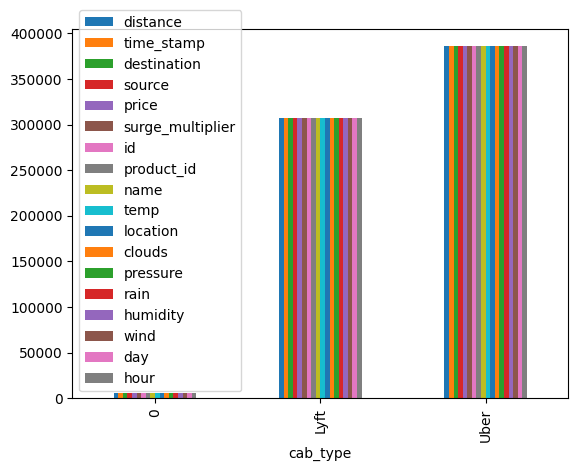

In [ ]:
a.groupby('cab_type').count().plot.bar()

<Axes: xlabel='price'>

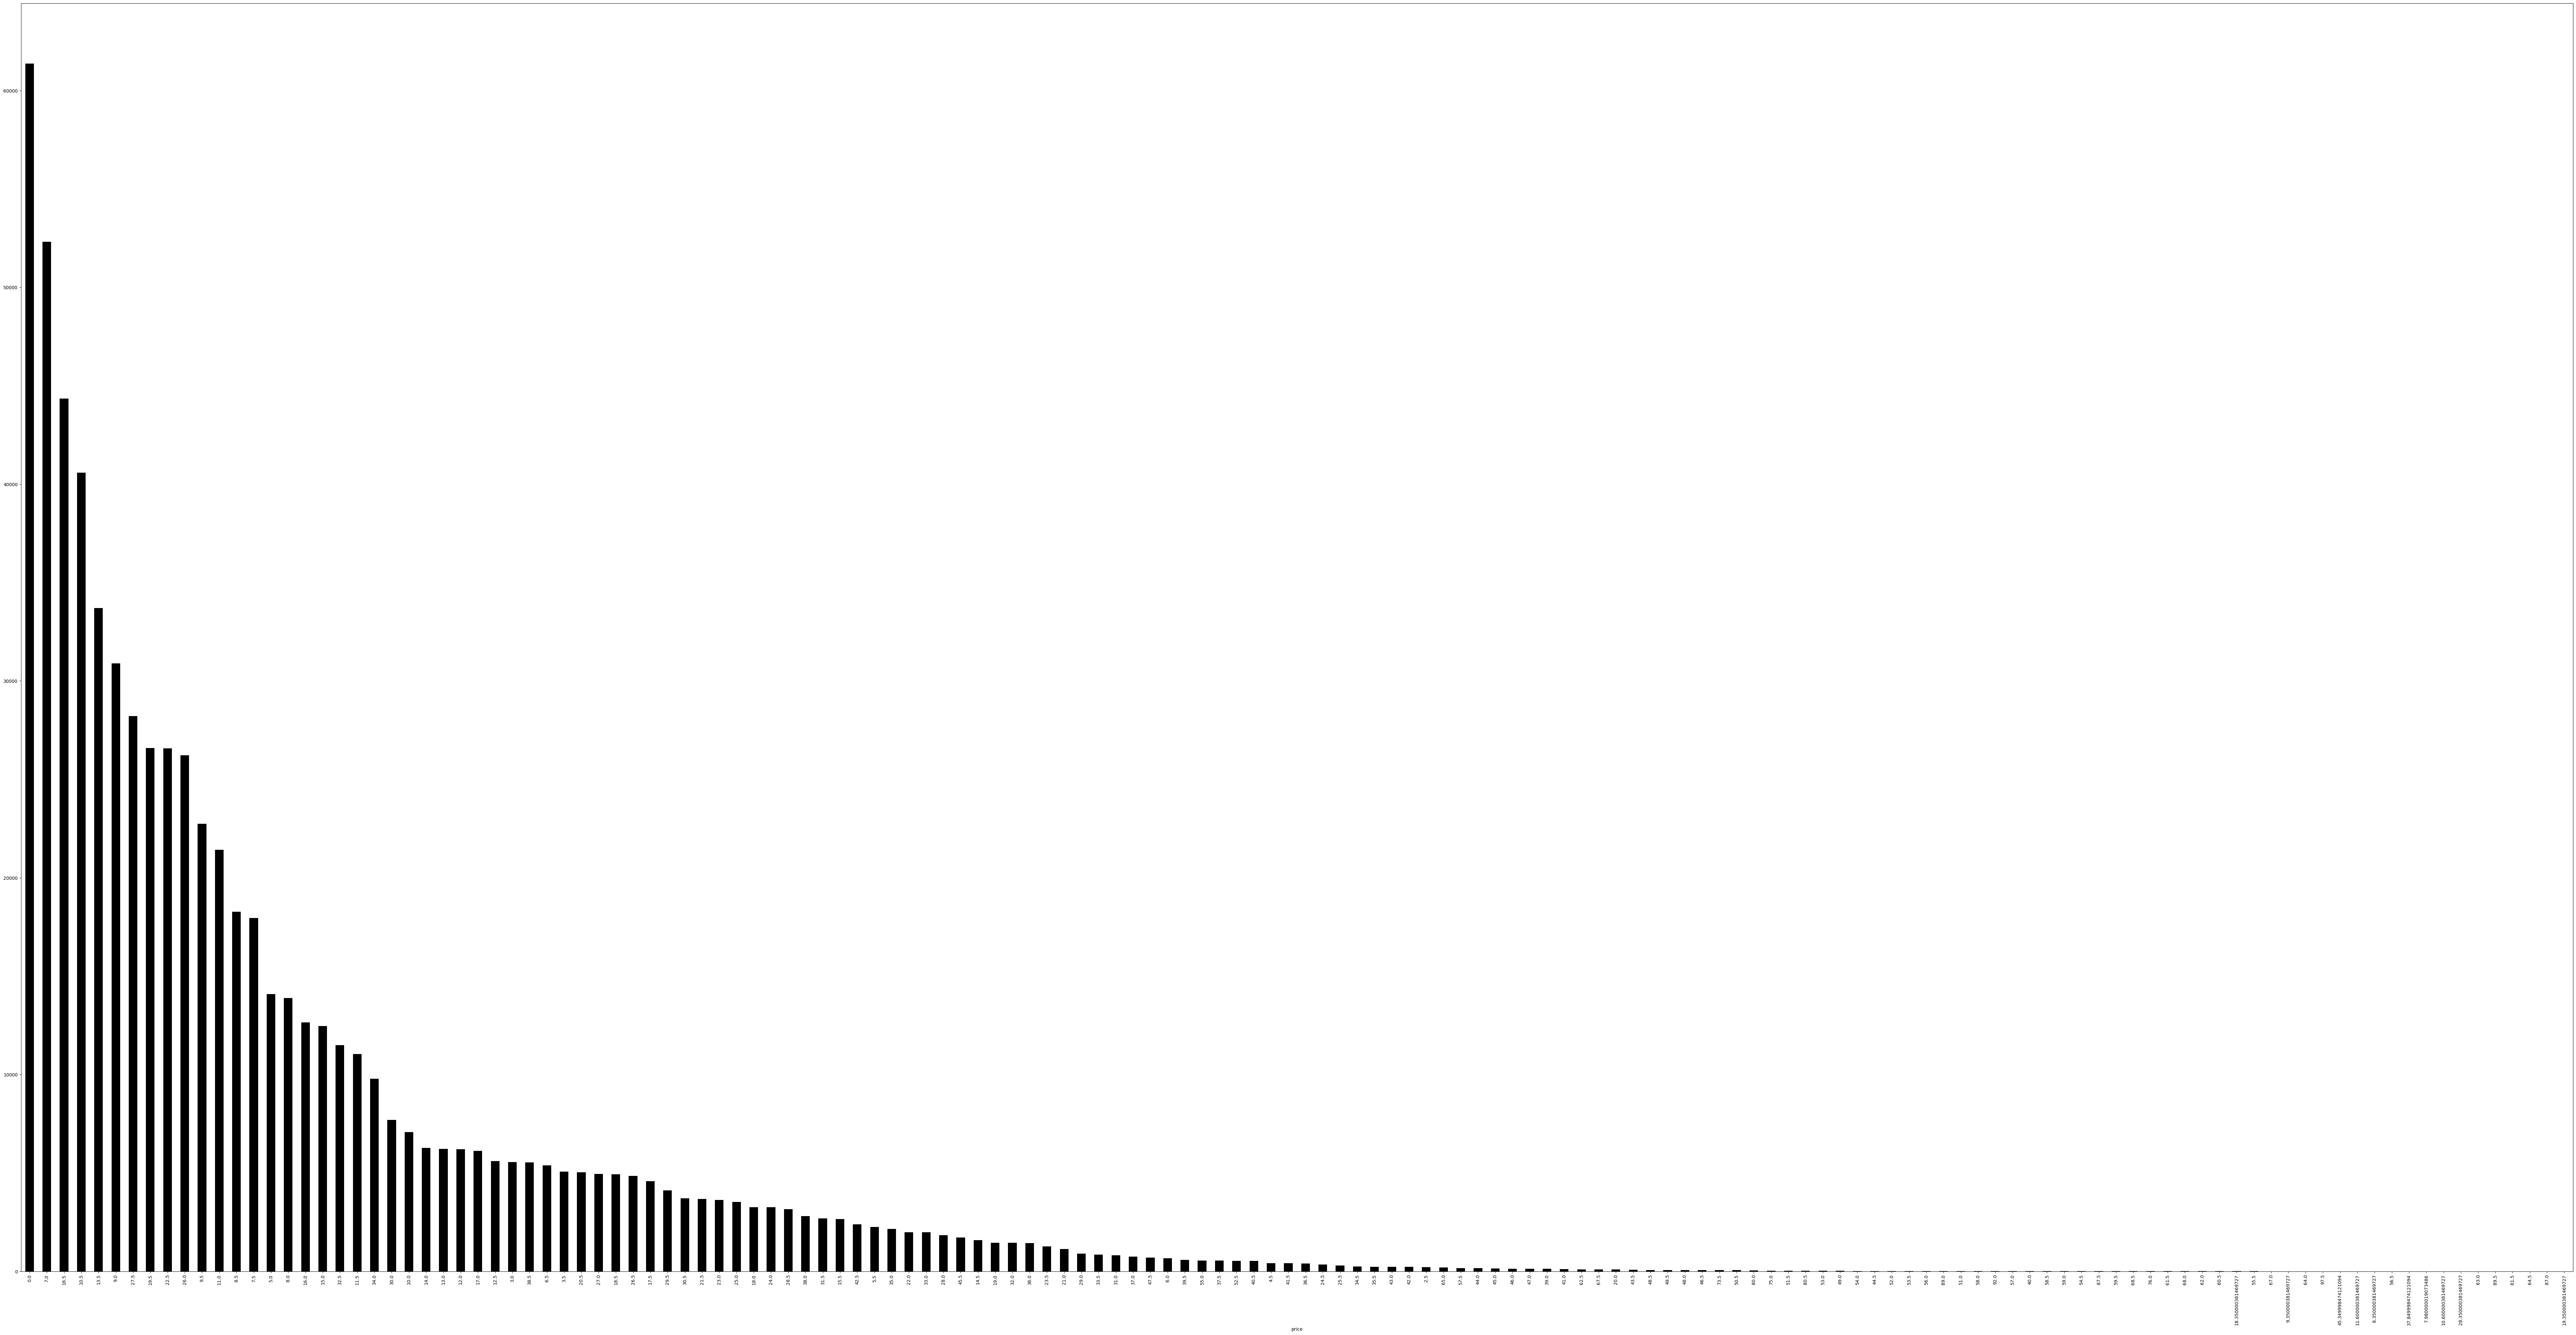

In [ ]:
a.price.value_counts().plot(kind='bar',figsize=(100,50),color='k')

<Axes: xlabel='hour'>

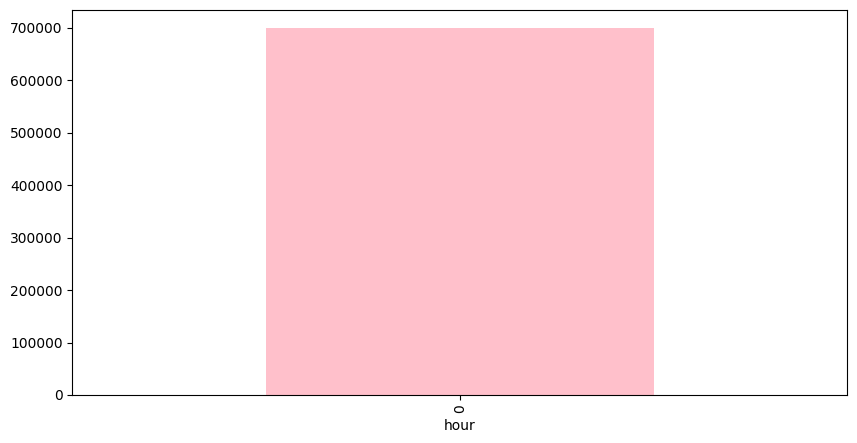

In [ ]:
a['hour'].value_counts().plot(kind='bar',figsize=(10,5),color='pink')

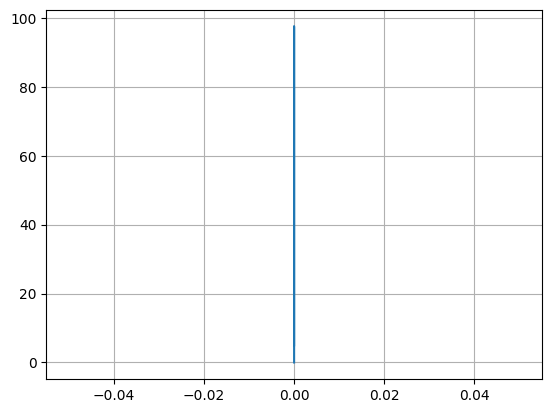

In [ ]:
import matplotlib.pyplot as plt
x=a['hour']
y=a['price']
plt.plot(x,y)
plt.grid()
plt.show()

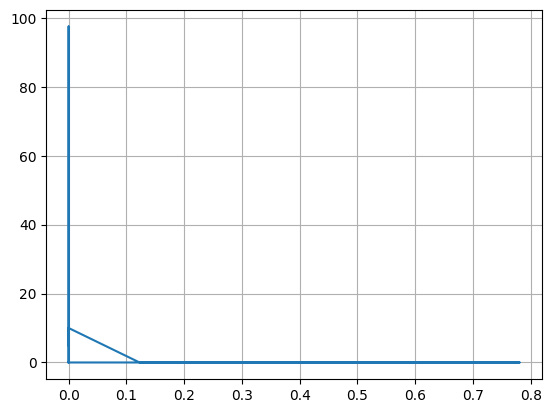

In [ ]:
x=a['rain']
y=a['price']
plt.plot(x,y)
plt.grid()
plt.show()

In [ ]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'temp', 'location',
       'clouds', 'pressure', 'rain', 'humidity', 'wind', 'day', 'hour'],
      dtype='object')

In [ ]:
x1=a[['distance','temp','clouds','pressure','humidity','wind','rain','day','hour','surge_multiplier']]
y1=a['price']

In [ ]:
# using skicit.learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, y_train, x_test, y_test = train_test_split(x1, y1, test_size=0.25, random_state=42)

In [ ]:
linear=LinearRegression()
linear.fit(x_train,x_test)

LinearRegression()

In [ ]:
pridictions=linear.predict(y_train)

In [ ]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pridictions})
df

Actual  Predicted
81607     42.5  32.547222
354        0.0  14.755640
471801    32.5  16.816987
407645    27.5  10.480252
474760    27.5  10.556598
...        ...        ...
538489     7.5  10.709291
579511    13.5  15.519101
5421       9.0  11.829035
279982     8.0  11.854484
236315    27.5  13.228715

[174837 rows x 2 columns]

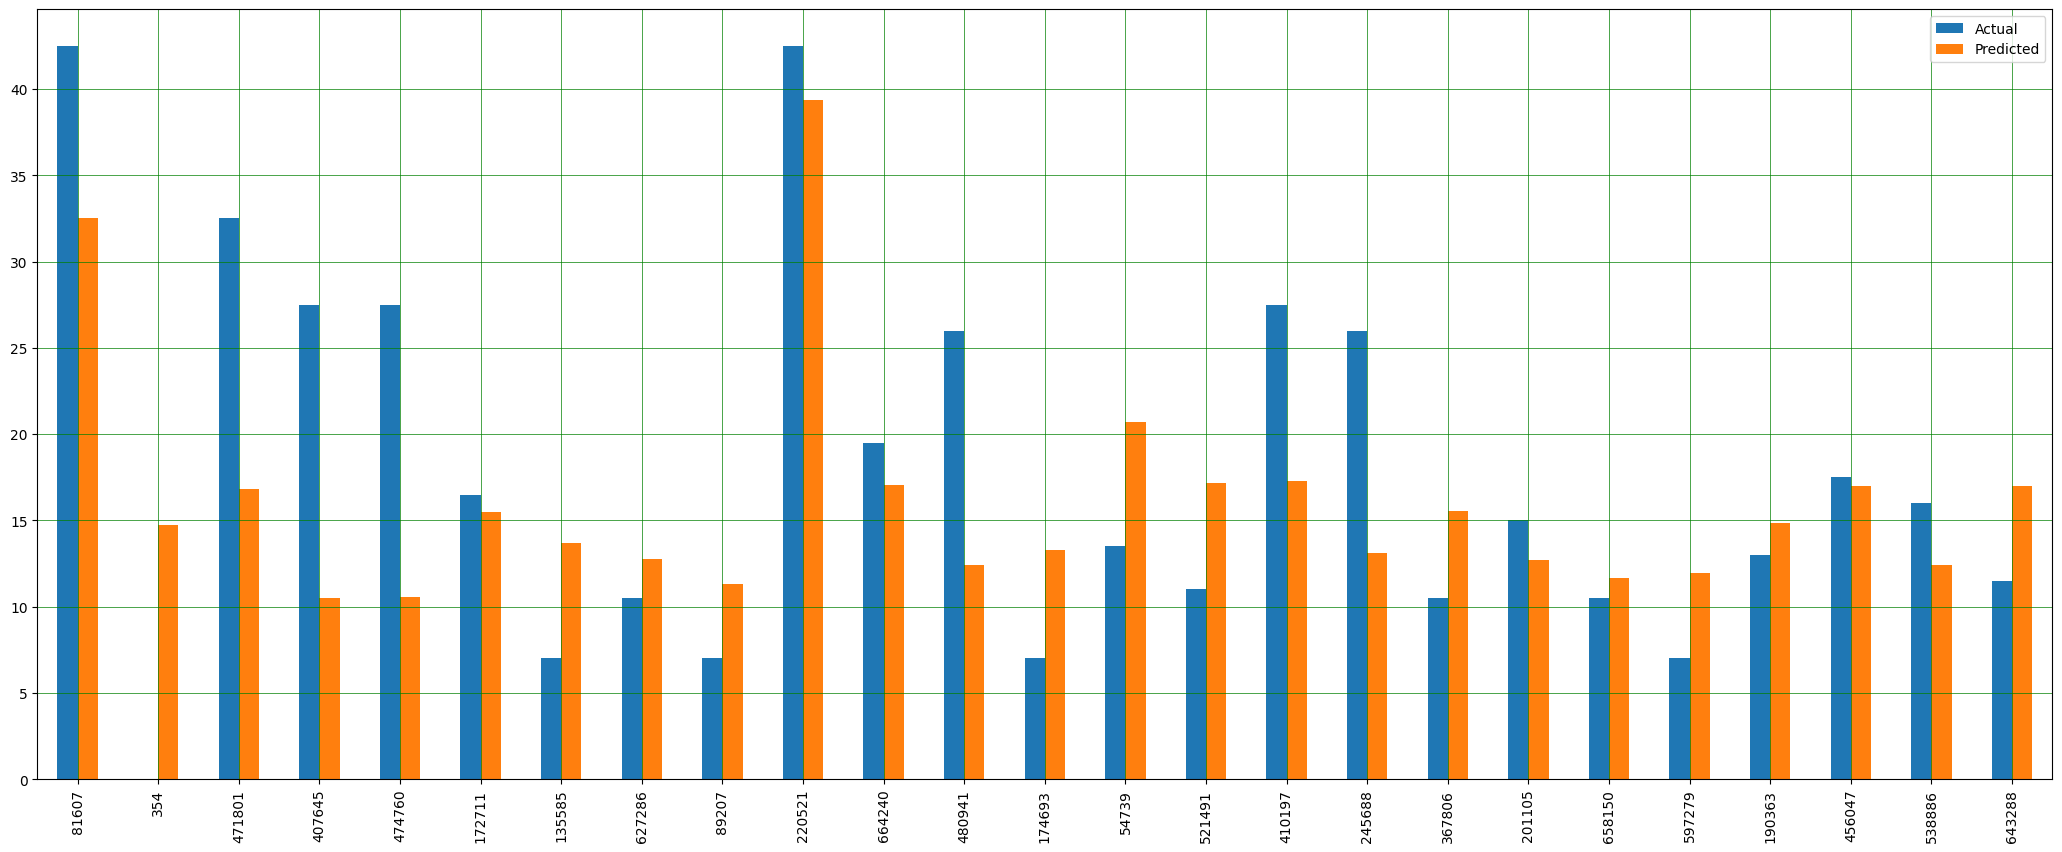

In [ ]:
df1=df.head(25)
df1.plot(kind='bar',figsize=(26,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()